<a href="https://colab.research.google.com/github/nanoSur/Data-Science-Collection/blob/main/pythonBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drive Snippets


In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Uploaded file with ID 1gfohHi9e_2AsNEAuVt47K7b7GNIU4g0P


In [ ]:
# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'File2.txt'})
uploaded.SetContentString('File 2 sample text')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1NqnNcIZO0tyzGgjDHapt0pGqqqBTV27Y


In [ ]:
# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.csv' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title Copy of mobile_cleaned.csv, id 1g1J6BWFNhuGpdMKzGOUKAUrOTsopjBRh
title Boston.csv, id 1-XQqkUwidvcypfg82G6fLq1JiNrc_S5hM0jRqZXH9UQ
title Boston.csv, id 1b2DL5LgaBsa7JoMO3m2yX0mThGNtkboMvfZtPsFG7os


In [ ]:
# Download a file based on its file ID.
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1HgjvG4rfc5yKz2d0FXcdBMvokpI2e6sl'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [ ]:
downloaded.GetContentFile('mobile_cleaned_local.csv')

In [ ]:
!ls

adc.json  mobile_cleaned_local.csv  sample_data


# Pandas

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('mobile_cleaned_local.csv')

In [ ]:
dir(df)

In [ ]:
df_short=df.loc[5:10]

In [ ]:
df_short.shape

(6, 40)

In [ ]:
len(df_short)

6

In [ ]:
df.head()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,screen_size,frames_per_second,FM,no_of_reviews_in_gsmarena_in_week,os,phone_height,screen_protection,sim_size,price,talk_time,video_resolution,display_resolution,removable_battery,display_type,primary_camera_resolution,battery_type,ram_memory,internal_memory,brand_rank,no_of_cores,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,0,12,55,155.0,250,1.3,10.5,5,2.00,0,4.5,15,3,0,0,132.9,26,3,3870,9,480,12,3,11,5.00,1,1,7,29,6,4,2,3,67.8,64.0,5,3,2000,125,1
1,0,1,55,132.0,300,1.3,10.6,5,0.30,1,4.0,30,2,6,0,124.5,26,5,4059,9,720,15,3,11,5.00,1,1,7,11,6,4,4,6,64.0,32.0,5,3,2000,165,1
2,0,9,55,142.0,329,1.5,8.5,5,2.00,3,5.0,30,2,20,0,145.5,4,3,4777,10,1080,4,3,1,5.04,2,1,7,27,6,4,9,6,72.0,32.0,6,3,2500,164,0
3,0,8,55,152.0,385,1.3,8.0,5,2.00,3,5.0,15,3,0,0,147.5,26,3,5799,19,720,17,3,2,5.00,1,1,7,4,6,4,1,3,75.1,32.0,6,3,3000,165,1
4,1,1,55,234.0,385,1.3,7.9,5,1.92,3,5.0,15,3,0,0,179.0,18,3,5990,11,720,17,3,1,5.00,1,1,7,4,6,4,1,6,91.0,32.0,6,3,3000,165,0


In [ ]:
df_thin=df[['front_camera_resolution','no_of_reviews_in_gsmarena_in_week','price','is_liked']]


In [ ]:
df_thin.shape

(109, 4)

In [ ]:
df_price_range=df_thin[df_thin['price']>=30000]

In [ ]:
df_price_range.shape

(21, 4)

In [ ]:
df_thin['price'].max()

64500

In [ ]:
df_thin['price'].describe()

count      109.000000
mean     19373.211009
std      14039.197220
min       3870.000000
25%       8999.000000
50%      14614.000000
75%      24999.000000
max      64500.000000
Name: price, dtype: float64

In [ ]:
df_thin.describe()

,front_camera_resolution,no_of_reviews_in_gsmarena_in_week,price,is_liked
count,109.000000,109.000000,109.000000,109.000000
mean,4.840550,108.266055,19373.211009,0.844037
std,2.578122,207.796715,14039.197220,0.364496
min,0.300000,0.000000,3870.000000,0.000000
25%,4.000000,0.000000,8999.000000,1.000000
50%,5.000000,24.000000,14614.000000,1.000000
75%,5.000000,122.000000,24999.000000,1.000000
max,16.000000,1304.000000,64500.000000,1.000000


In [ ]:
df_thin[df_thin['is_liked']==1]['price'].mean()

19393.239130434784

In [ ]:
g=df_thin.groupby(['is_liked'])

In [ ]:
for key,df_key in g:
  print(key)
  print(df_key)

0
     front_camera_resolution  ...  is_liked
2                       2.00  ...         0
4                       1.92  ...         0
5                       5.00  ...         0
11                      5.00  ...         0
22                      5.00  ...         0
38                      5.00  ...         0
53                      5.00  ...         0
60                      8.00  ...         0
74                      2.00  ...         0
77                      8.00  ...         0
78                      8.00  ...         0
80                      4.00  ...         0
83                     13.00  ...         0
90                      5.00  ...         0
91                      1.20  ...         0
95                      4.00  ...         0
108                     8.00  ...         0

[17 rows x 4 columns]
1
     front_camera_resolution  ...  is_liked
0                        2.0  ...         1
1                        0.3  ...         1
3                        2.0  ...         1
6    

In [ ]:
df_thin.groupby(['is_liked']).mean()

,front_camera_resolution,no_of_reviews_in_gsmarena_in_week,price
is_liked,,,
0,5.301176,13.941176,19264.823529
1,4.755435,125.695652,19393.239130


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

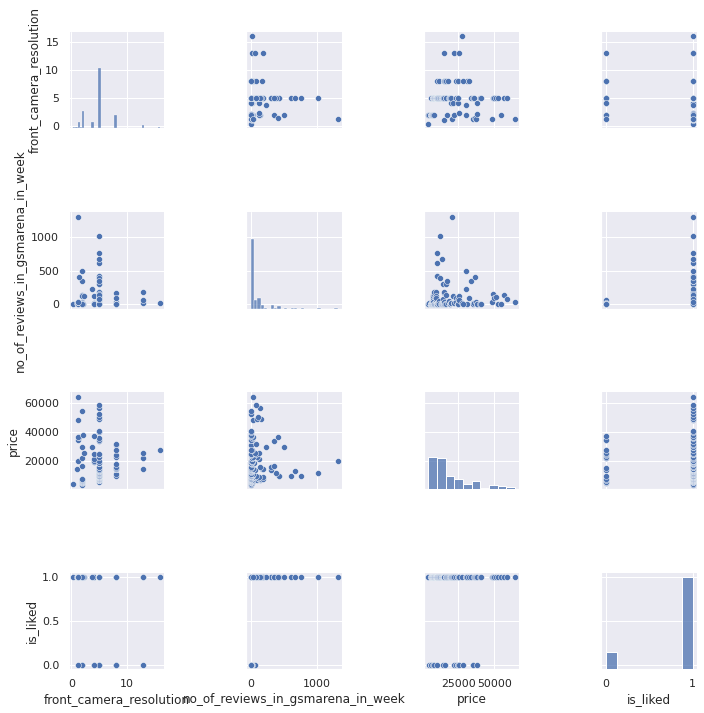

In [ ]:
ax=sns.pairplot(df_thin,diag_kind='hist')

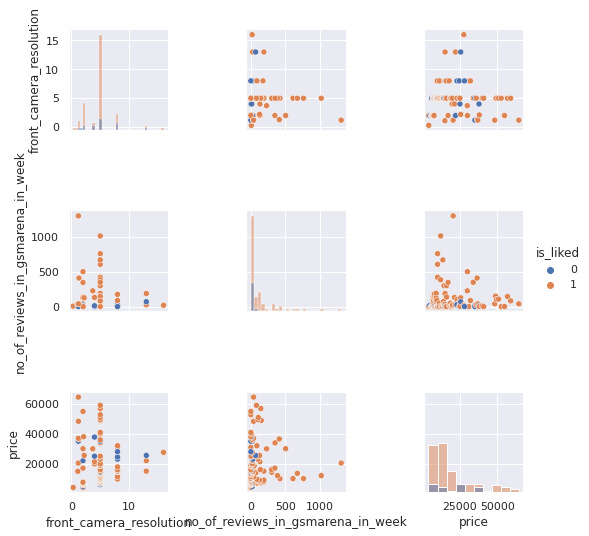

In [ ]:
ax=sns.pairplot(df_thin,diag_kind='hist',hue='is_liked')

# Debugging


In [ ]:
import random
import numpy as np

In [ ]:
def factorial(x):
  if(x==0):
    return 1
  return x*factorial(x-1)

In [ ]:
factorial(10)

3628800

In [ ]:
def code_to_debug():
  import pdb; pdb.set_trace()
  for i in range(10):
    x=random.random()
    factorial_debugged(x)

In [ ]:
code_to_debug()

> <ipython-input-125-6fbcccc14794>(3)code_to_debug()
-> for i in range(10):
(Pdb) step
> <ipython-input-125-6fbcccc14794>(4)code_to_debug()
-> x=random.random()
(Pdb) step
> <ipython-input-125-6fbcccc14794>(5)code_to_debug()
-> factorial_debugged(x)
(Pdb) quit


BdbQuit: ignored

In [ ]:
def factorial_debugged(x):
  if(not isinstance(x,int)):
    print('This method only supports integers')
    return -1
  if(x==0.0):
    return 1
  return x*factorial(x-1)

In [ ]:
def code_to_debug():
  #import pdb; pdb.set_trace()
  for i in range(10):
    x=random.random()
    factorial(x)

In [ ]:
%xmode Verbose

In [ ]:
code_to_debug()

> <ipython-input-130-6fbcccc14794>(3)code_to_debug()
-> for i in range(10):
(Pdb) quit


BdbQuit: ignored

# Vectors


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

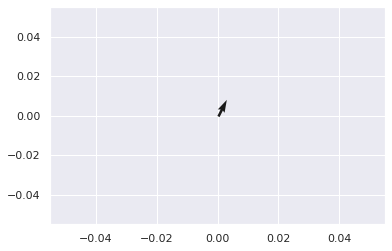

In [ ]:
plt.quiver(0,0,5,10)
plt.show()

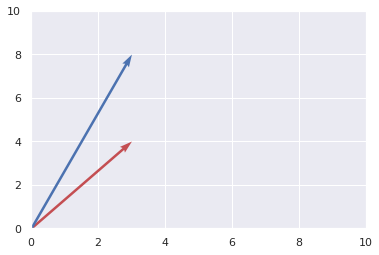

In [ ]:
plt.quiver(0,0,3,4,scale_units='xy',angles='xy',scale=1,color='r')
plt.quiver(0,0,3,8,scale_units='xy',angles='xy',scale=1,color='b')
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

In [ ]:
def plotVectors(x,y):
  plt.quiver(0,0,x,y,scale_units='xy',angles='xy',scale=1,color='r')
  plt.quiver(0,0,x,2*y,scale_units='xy',angles='xy',scale=1,color='g')
  plt.xlim(0,x+10)
  plt.ylim(0,y+2*y)
  plt.show()

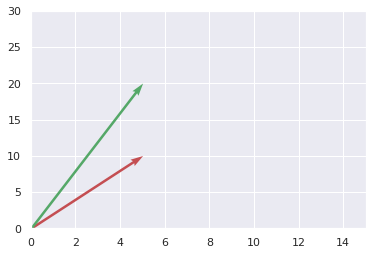

In [ ]:
plotVectors(5,10)

In [ ]:
def plotVectors_2(vecs):
  colors=['r','g','b','y']
  i=0
  for vec in vecs: #use tuples
    plt.quiver(vec[0],vec[1],vec[2] ,vec[3], scale_units='xy',angles='xy',scale=0.5,color=colors[i%len(colors)])
    i+=1;
    plt.xlim(-10,10)
    plt.ylim(-10,10)
plt.show()

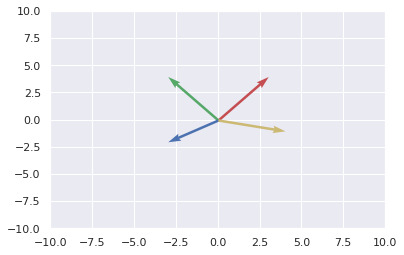

In [ ]:
plotVectors_2([(0,0,3,4),(0,0,-3,4),(0,0,-3,-2),(0,0,4,-1)])

In [ ]:
vecs=[np.asarray([0,0,3,4]),np.asarray([0,0,-3,4]),np.asarray([0,0,-3,-2]),np.asarray([0,0,4,-1])]

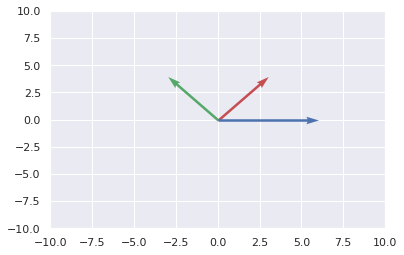

In [ ]:
plotVectors_2([vecs[0],vecs[1],vecs[0]-vecs[1]])

In [ ]:
vecs[0]+vecs[3]

array([0, 0, 7, 3])

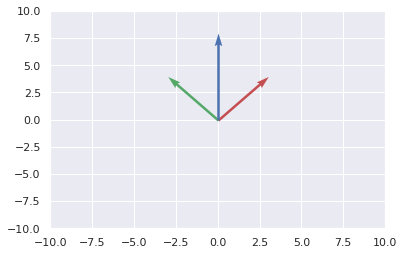

In [ ]:
plotVectors_2([vecs[0],vecs[1],vecs[0]+vecs[1]])

In [ ]:
a=np.asarray([9,2])
b=np.asarray([5,4])

$\vec{a}\cdot\vec{b}=|\vec{a}||\vec{b}|\cos(\theta)=a_x b_x + a_yb_y$

In [ ]:
a_dot_b=np.dot(a,b)

In [ ]:
a_dot_b

53

$a_b=|\vec{a} | \cos(\theta)=|\vec{a}|\frac{\vec{a}\cdot\vec{b}}{|\vec{a}| |\vec{b}|}$

In [ ]:
a_b=np.dot(a,b)/ np.linalg.norm(b)
a_b

8.27720938009612

In [ ]:
vec_a_b=(a_b/np.linalg.norm(b))*b
vec_a_b

array([6.46341463, 5.17073171])

$\vec{a_b}=a_b \hat{b} =a_b \frac{\vec{b}}{|\vec{b}|}$

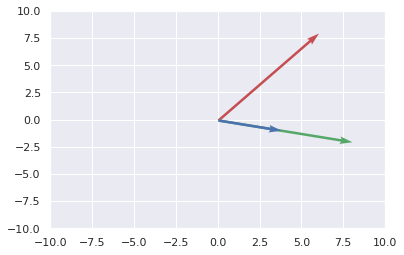

In [ ]:
plotVectors_2([np.asarray([0,0,3,4]),np.asarray([0,0,4,-1]),np.asarray([0,0,1.88235294, -0.47058824])])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
